<a href="https://colab.research.google.com/github/saismrutidas/Coffee-Compass/blob/main/Copy_of_Coffee_Compass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coffee Compass
This project aims to develop a predictive model to estimate total cup points, a comprehensive measure of coffee quality, based on various influencing factors. We use a dataset provided by the Coffee Quality Union, consisting of coffee samples from Colombia, each described by features such as origin country, company, altitude, harvest year, processing method, sensory attributes, moisture percentage, category one and two defects, color, expiration, certification body, and coffee age.

Our methodology includes data preprocessing, data exploration through visualizations, and applying a machine learning model — specifically, a Random Forest Regressor — to predict the total cup points. Additionally, we assess the model's performance and visualize the results to understand its accuracy and identify the significance of each feature in predicting coffee quality.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors
from dateutil import parser

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE

In [ ]:
df = pd.read_csv("/content/df_arabica_clean.csv")

In [ ]:
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


## Data Cleaning and Preparation
Data cleaning and preparation are the critical steps in building a reliable predictive model. This process involves handling missing values, correcting inconsistent data entries, and transforming categorical variables into numerical representations suitable for machine learning algorithms. In this project, we address missing data by employing appropriate imputation techniques and removing incomplete records. Additionally, we standardize numerical features to ensure consistent scaling and encode categorical variables using techniques such as one-hot encoding. Feature selection is also performed to eliminate irrelevant or redundant attributes, enhancing model performance and reducing computational complexity. Finally, the prepared dataset is split into training and testing sets to ensure robust model evaluation.

### Duplicate handling


In [ ]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 41)


### Uniqueness
  We check for the distinct valus in our dataset


In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0: 207 distinct values
ID: 207 distinct values
Country of Origin: 22 distinct values
Farm Name: 173 distinct values
Lot Number: 188 distinct values
Mill: 163 distinct values
ICO Number: 68 distinct values
Company: 72 distinct values
Altitude: 98 distinct values
Region: 121 distinct values
Producer: 173 distinct values
Number of Bags: 55 distinct values
Bag Weight: 39 distinct values
In-Country Partner: 21 distinct values
Harvest Year: 7 distinct values
Grading Date: 75 distinct values
Owner: 80 distinct values
Variety: 49 distinct values
Status: 1 distinct values
Processing Method: 11 distinct values
Aroma: 19 distinct values
Flavor: 19 distinct values
Aftertaste: 20 distinct values
Acidity: 19 distinct values
Body: 17 distinct values
Balance: 18 distinct values
Uniformity: 3 distinct values
Clean Cup: 1 distinct values
Sweetness: 1 distinct values
Overall: 21 distinct values
Defects: 1 distinct values
Total Cup Points: 81 distinct values
Moisture Percentage: 46 distinct value

### Missing values
Checking for the missing values in our dataset

In [ ]:
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio
ICO Number,63.768116
Variety,2.898551
Processing Method,2.415459
Mill,1.449275
Farm Name,0.966184
Region,0.966184
Lot Number,0.483092
Altitude,0.483092
Producer,0.483092


### Completeness
The completeness of the dataset is checked here, by fixing the values in the columns, imputing specific values and defining a function to clean the dataset and calculate the mean

In [ ]:
# Mapping the Education
processing_mapping = {
    "Double Anaerobic Washed": "Washed / Wet",
    "Semi Washed": "Washed / Wet",
    "Honey,Mossto": "Pulped natural / honey",
    "Double Carbonic Maceration / Natural": "Natural / Dry",
    "Wet Hulling": "Washed / Wet",
    "Anaerobico 1000h": "Washed / Wet",
    "SEMI-LAVADO": "Natural / Dry"
}

In [ ]:
# Fixing the values in the column
df['Processing Method'] = df['Processing Method'].map(processing_mapping)
df['Processing Method'].fillna("Washed / Wet", inplace=True)

<ipython-input-10-b1fd763a8152>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Processing Method'].fillna("Washed / Wet", inplace=True)


In [ ]:
# Imputing specific values based on ID
df.loc[df['ID'] == 99, 'Altitude'] = 5273  # Impute value for ID 99
df.loc[df['ID'] == 105, 'Altitude'] = 1800  # Impute value for ID 105
df.loc[df['ID'] == 180, 'Altitude'] = 1400  # Impute value for ID 180

In [ ]:
# Cleaning and calculating mean
def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")  # Remove blank spaces
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value

In [ ]:
df['Altitude'] = df['Altitude'].apply(clean_altitude_range)

In [ ]:
#Extracting the prior year from the "Harvest Year" column
df['Harvest Year'] = df['Harvest Year'].str.split('/').str[0].str.strip()

### Feature Engineering

To avoid confusion, the date of the dataset is set to one particular format


In [ ]:
# Converting "Harvest Year" and "Expiration" columns to datetime objects using dateutil parser
df['Harvest Year'] = pd.to_datetime(df['Harvest Year'], format='%Y')
df['Expiration'] = df['Expiration'].apply(parser.parse)

In [ ]:
# Calculating the difference in days between "Expiration" and "Harvest Year" columns
df['Coffee Age'] = (df['Expiration'] - df['Harvest Year']).dt.days

Excluding the columns that are not required for our analysis


In [ ]:
# Excluding the columns that are irrelevant to the analysis
columns_to_drop = ['ID','ICO Number','Owner','Region','Certification Contact','Certification Address','Farm Name',"Lot Number","Mill","ICO Number","Producer",'Company','Expiration', 'Harvest Year',
                   "Unnamed: 0",'Number of Bags','Bag Weight','In-Country Partner','Grading Date','Variety','Status','Defects','Uniformity','Clean Cup','Sweetness','Certification Body']
df.drop(columns_to_drop, axis=1, inplace=True)

### Exploratory Data Analysis


List down the numeric attributes

In [ ]:
# List of numeric attributes
numeric_attributes = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage','Coffee Age']


In [ ]:
# Creating a subplot for each numeric attribute
fig = make_subplots(rows=len(numeric_attributes), cols=1)

For each numeric attribute, we use histogram to show the attributes based on our coffee sample

In [ ]:
# Adding a histogram to the subplot for each numeric attribute for better viaualisation
for i, attribute in enumerate(numeric_attributes):
    fig.add_trace(go.Histogram(x=df[attribute], nbinsx=50, name=attribute), row=i+1, col=1)

fig.update_layout(height=200*len(numeric_attributes), width=800, title_text="Histogram of Numeric Attributes")
fig.show()

### Geospatial Analysis

Grouping the data by country and calculating total cup points, a comprehensive measure of coffee quality, based on various influencing factors.

In [ ]:
# Grouping the data by country and calculate the mean of Total Cup Points
df_grouped = df.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()

Creating a choropleth map, which uses differences in shading, colouring, or placing symbols within predefined areas to indicate the average values of a particular quantity, showing the countries according to the average total cup points.

In [ ]:
# Creating a Choropleth map
fig = px.choropleth(df_grouped,
                    locations='Country of Origin',
                    locationmode='country names',
                    color='Total Cup Points',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Total Cup Points by Country')

fig.show()

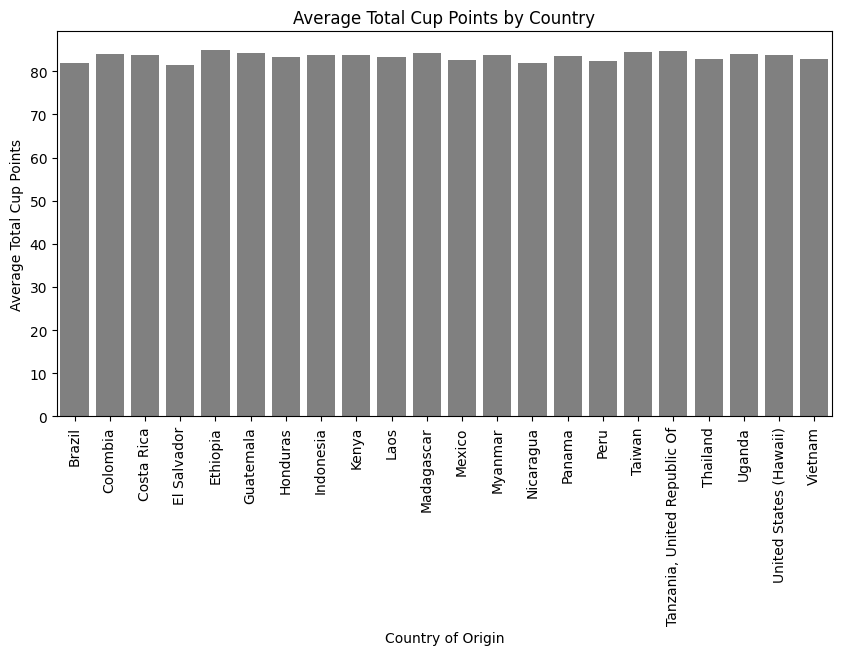

In [ ]:
# Creating a bar plot with gray color
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country of Origin'], y=df_grouped['Total Cup Points'], color='gray')
plt.title('Average Total Cup Points by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Average Total Cup Points')
plt.xticks(rotation=90)
plt.show()

Grouping data by country based on coffee age

In [ ]:
# Grouping the data by country and calculate the mean of Total Cup Points
df_grouped = df.groupby('Country of Origin')['Coffee Age'].mean().reset_index()


Creating a choropleth map for better visualisation


In [ ]:
# Creating a Choropleth map
fig = px.choropleth(df_grouped,
                    locations='Country of Origin',
                    locationmode='country names',
                    color='Coffee Age',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Coffee Shelter Life by Country (Days)')

fig.show()

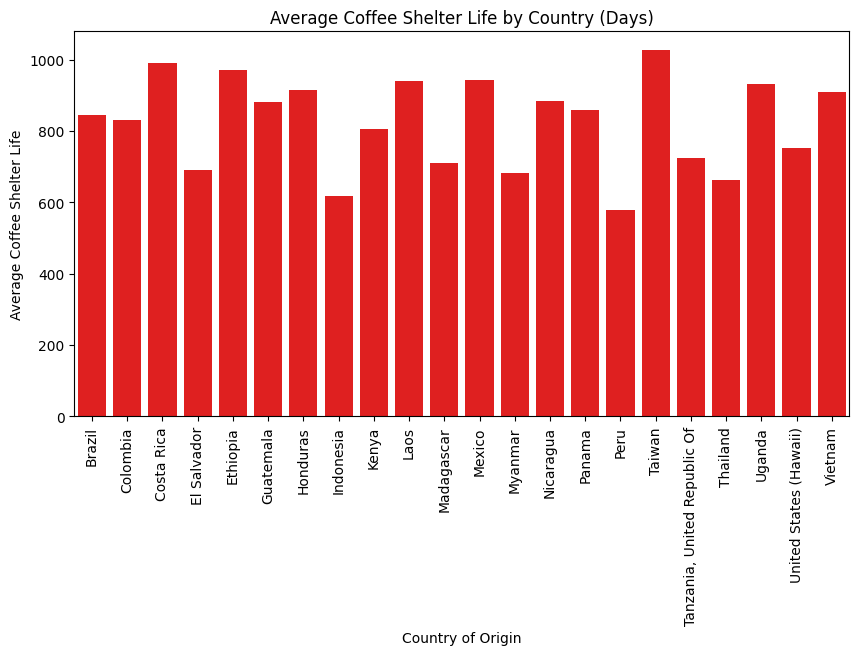

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country of Origin'], y=df_grouped['Coffee Age'], color='red')
plt.title('Average Coffee Shelter Life by Country (Days)')
plt.xlabel('Country of Origin')
plt.ylabel('Average Coffee Shelter Life')
plt.xticks(rotation=90)
plt.show()

GGrouping the data based on the altitude of the country. This shows how the growth of coffee beans is affected by the altitude

In [ ]:
# Grouping the data by country and calculate the mean of Altitude
df_grouped = df.groupby('Country of Origin')['Altitude'].mean().reset_index()

In [ ]:
fig = px.choropleth(df_grouped,
                    locations='Country of Origin',
                    locationmode='country names',
                    color='Altitude',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Altitude by Country')
fig.show()

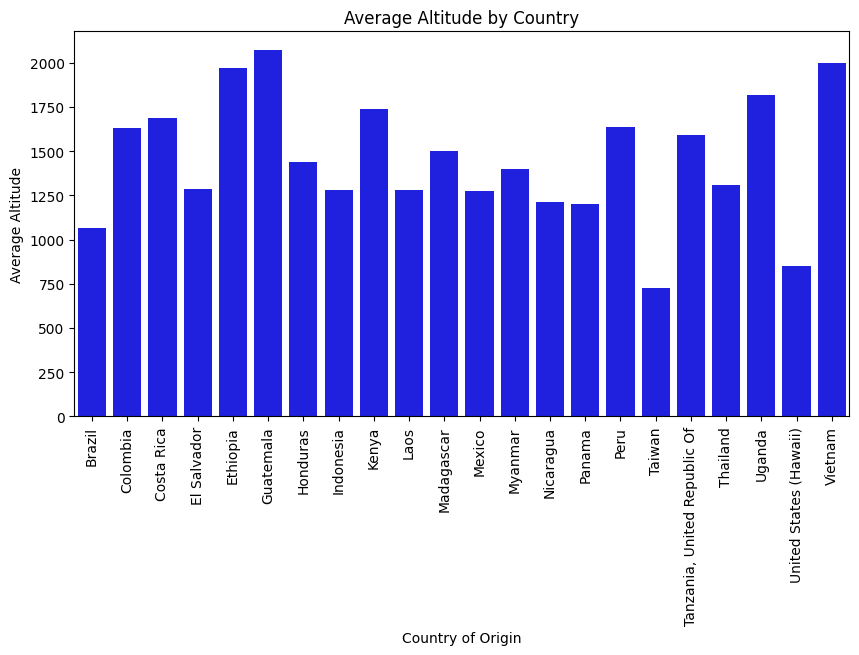

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country of Origin'], y=df_grouped['Altitude'], color='blue')
plt.title('Average Altitude by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Average Altitude')
plt.xticks(rotation=90)
plt.show()

Counting the unique occurrences of each country

In [ ]:
df_count = df['Country of Origin'].value_counts().reset_index()
df_count.columns = ['Country of Origin', 'Count']

In [ ]:
fig = px.choropleth(df_count,
                    locations='Country of Origin',
                    locationmode='country names',
                    color='Count',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Count of Unique Countries')

fig.show()

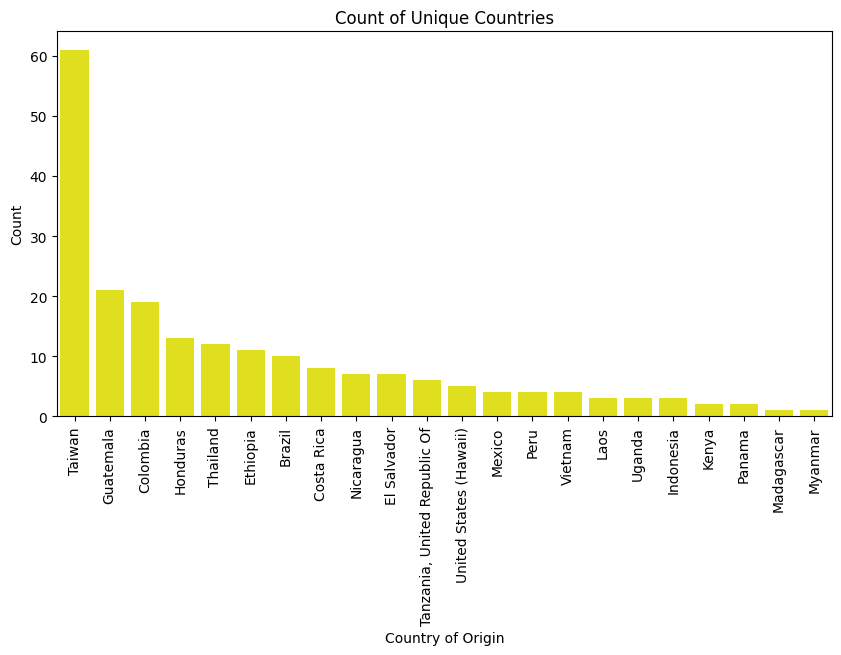

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_count['Country of Origin'], y=df_count['Count'], color='yellow')
plt.title('Count of Unique Countries')
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Correlation

Dealing with categorical and numerical column

In [ ]:
data = df.copy()
categorical_columns = ['Processing Method']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']
columns_to_drop = ['Country of Origin', 'Color']
data.drop(columns_to_drop, axis=1, inplace=True)
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

Preprocessing and Scaling the data
Preprocessing involves handling missing values, encoding categorical data, and ensuring consistency. Scaling standardizes numerical features, enhancing model performance and training efficiency before data splitting.

In [ ]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

Dealing with categorical variables

Creati Dummy Variables to have better correlation and visualising it using heat map.

In [ ]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

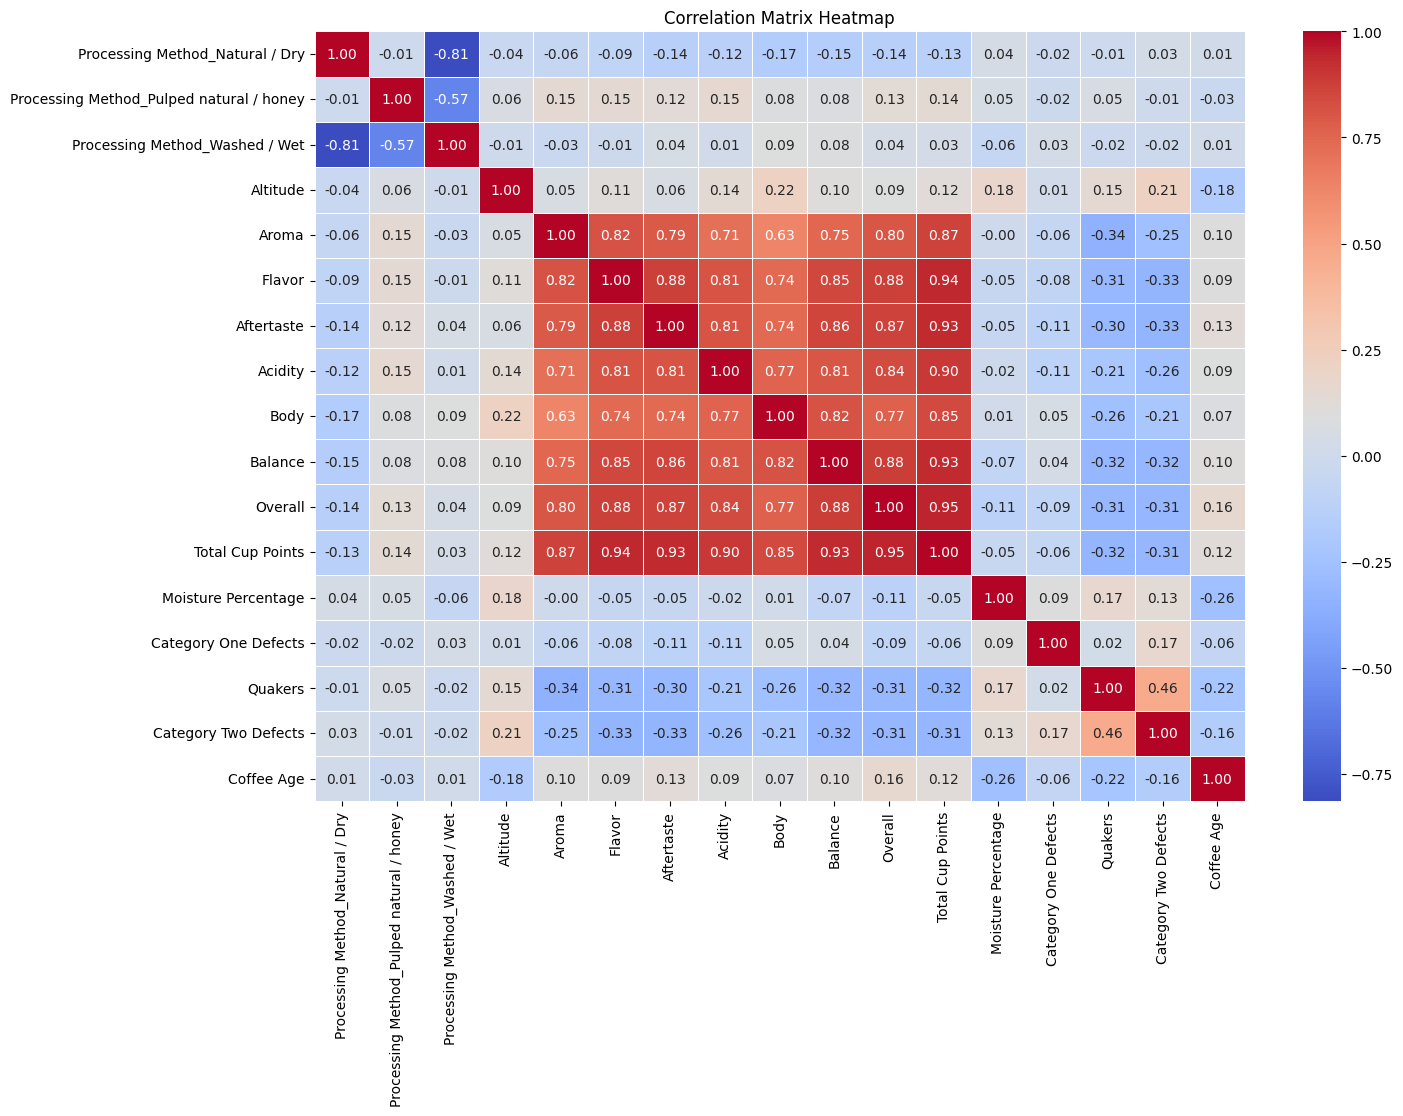

In [ ]:
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['Total Cup Points'].drop('Total Cup Points')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

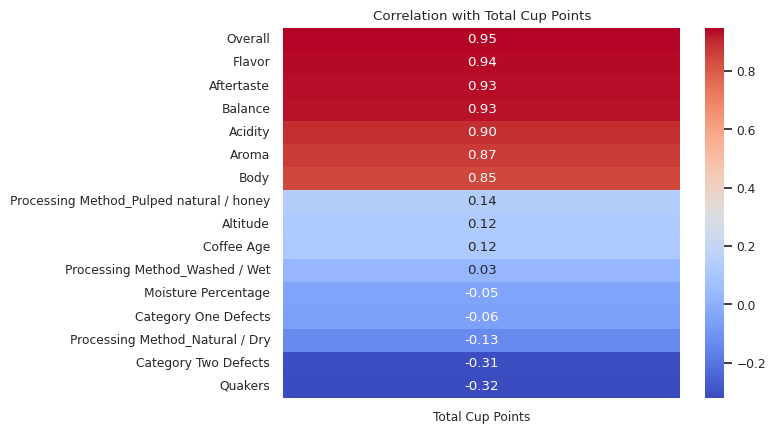

In [ ]:
#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Total Cup Points')
plt.show()

Interpretation

*  Overall, Flavor, Aftertaste, Balance, Acidity, Aroma, Body: These variables
have strong positive correlations with 'Total Cup Points'. This means that as these variables increase, the 'Total Cup Points' also tend to increase. For example, a higher 'Overall' rating or 'Flavor' rating is associated with a higher 'Total Cup Points' score.
*   Processing Method_Pulped natural / honey, Altitude, Coffee Age, Processing Method_Washed / Wet: These variables have weak positive correlations with 'Total Cup Points'. This suggests that these variables might have a slight positive effect on 'Total Cup Points', but the relationship is not as strong as the previous variables.

*  Moisture Percentage, Category One Defects: These variables have weak negative correlations with 'Total Cup Points'. This means that as these variables increase, the 'Total Cup Points' tend to decrease slightly. However, the correlation is weak, so these variables might not have a significant impact on 'Total Cup Points'.
*   Processing Method_Natural / Dry, Category Two Defects, Quakers: These variables have moderate negative correlations with 'Total Cup Points'. This suggests that as these variables increase, the 'Total Cup Points' tend to decrease. For example, a higher number of 'Category Two Defects' or 'Quakers' is associated with a lower 'Total Cup Points' score.














### Predictive analysis

### Clustering Analysis
The preprocessing step involved encoding of categorical variables and MinMax scaling for numerical variables:

*  Label encoding:
Label encoding was applied to the categorical features. The categories of each feature were assigned a unique numerical label.
*  
MinMax scaling:
MinMax scaling was applied to the numerical features. This scaling method transforms the data to fit within a specific range, typically (0, 1). In this case, numerical_features were scaled.






In [ ]:
# Creating a copy of the dataframe to not alter the original
df_preprocessed = df.copy()

In [ ]:
# Preprocessing: Label encoding for categorical variables
le = LabelEncoder()
categorical_features = ['Country of Origin', 'Processing Method', 'Color']
for feature in categorical_features:
    df_preprocessed[feature] = le.fit_transform(df[feature])

In [ ]:
# Preprocessing: MinMax scaling for numerical/ratio variables
mm = MinMaxScaler()
numerical_features = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']
for feature in numerical_features:
    df_preprocessed[feature] = mm.fit_transform(df[feature].values.reshape(-1,1))

In [ ]:
# Apply t-SNE with different perplexity and learning rate
tsne = TSNE(n_components=2, random_state=42, perplexity=50, learning_rate=200)
tsne_results = tsne.fit_transform(df_preprocessed)

In [ ]:
# Plotly Interactive plot
df_tsne = pd.DataFrame(data = tsne_results, columns = ['Dim_1', 'Dim_2'])
df_tsne['Total Cup Points'] = df['Total Cup Points']
fig = px.scatter(df_tsne, x='Dim_1', y='Dim_2', color='Total Cup Points', title='t-SNE plot colored by Total Cup Points')
fig.show()

From the plot, we can observe the following:

Clusters: The points on the plot seem to form clusters, which could suggest that there are groups of coffee samples with similar characteristics in your dataset. Color Gradient: The color gradient, which represents the 'Total Cup Points', shows a clear pattern across the clusters. This suggests that the coffee quality varies within each cluster. Outliers: There don't appear to be any clear outliers in the plot, suggesting that most of the coffee samples have similar characteristics.

## Score Prediction


In [ ]:
df.head()

,Country of Origin,Altitude,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Coffee Age
0,Colombia,1815.0,Washed / Wet,8.58,8.50,8.42,8.58,8.25,8.42,8.58,89.33,11.8,0,0,green,3,993
1,Taiwan,1200.0,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,8.50,87.58,10.5,0,0,blue-green,0,1048
2,Laos,1300.0,Washed / Wet,8.33,8.42,8.08,8.17,7.92,8.17,8.33,87.42,10.4,0,0,yellowish,2,1048
3,Costa Rica,1900.0,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,8.25,87.17,11.8,0,0,green,0,628
4,Colombia,1975.0,Pulped natural / honey,8.33,8.33,8.08,8.25,7.92,7.92,8.25,87.08,11.6,0,2,yellow-green,2,794


In [ ]:
categorical_columns = ['Processing Method','Country of Origin', 'Color']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']



In [ ]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), [col for col in numerical_columns if col != 'Total Cup Points']),
        ('cat', OneHotEncoder(), categorical_columns)])


In [ ]:
# Append classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))])

In [ ]:
# Split the data into train and test sets
X = df.drop('Total Cup Points', axis=1)
y = df['Total Cup Points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Altitude', 'Aroma',
                                                   'Flavor', 'Aftertaste',
                                                   'Acidity', 'Body', 'Balance',
                                                   'Overall',
                                                   'Moisture Percentage',
                                                   'Category One Defects',
                                                   'Quakers',
                                                   'Category Two Defects',
                                                   'Coffee Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Processing Method',
                                                   'Country of Origin',
                                                   'Color'])])),
                ('classifier', RandomForestRegressor(random_state=42))])

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.12949020428571217


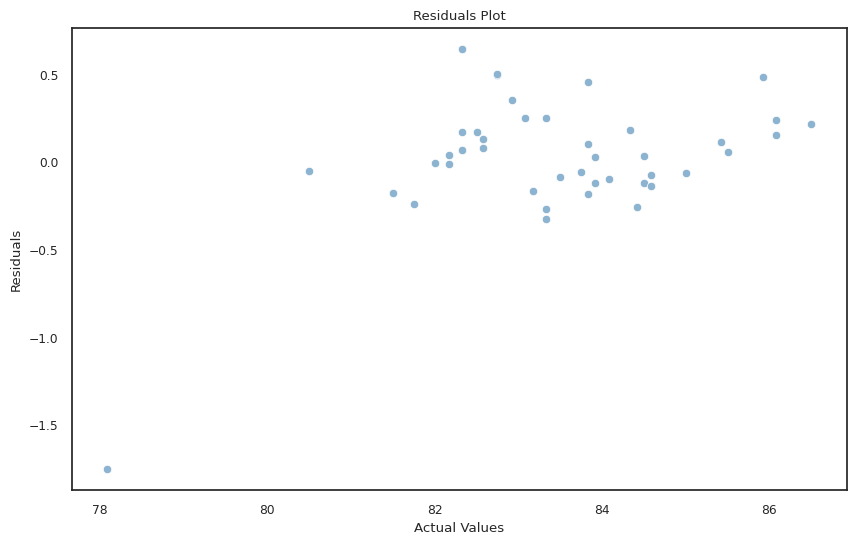

In [ ]:
# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

This plot illustrates the difference between actual and predicted values in a regression model.  

The x-axis shows the actual 'Total Cup Points', while the y-axis displays the residuals, calculated as the difference between actual and predicted values. In an ideal model, all points align along the horizontal line at y=0, indicating perfect predictions.  

The spread of residuals around the y=0 line suggests that errors are randomly scattered, which is a positive sign. However, points deviating significantly from this line highlight inaccurate predictions.  

The density of points also reveals error distribution—clusters far from the y=0 line may indicate systematic errors in the model.

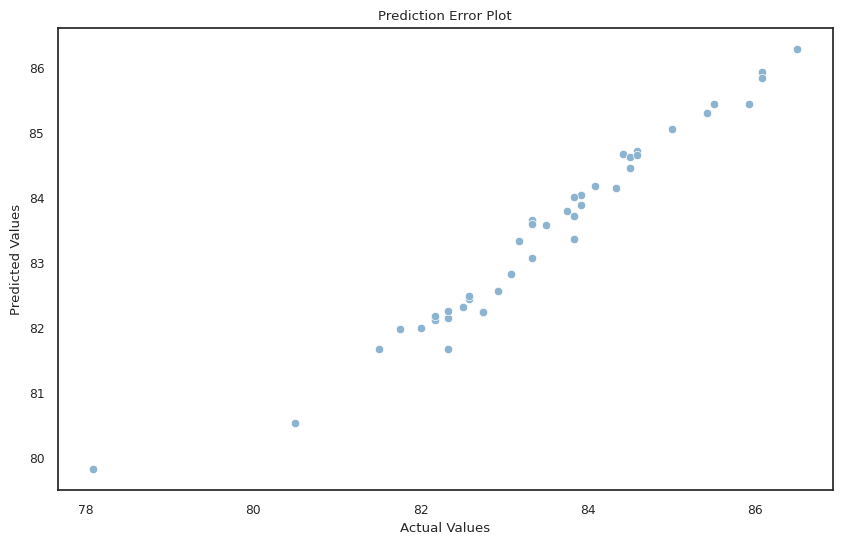

In [ ]:
# Plot prediction error
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Prediction Error Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

A Prediction Error Plot helps visualize the differences between actual and predicted values in a regression model.  

The x-axis shows actual 'Total Cup Points', while the y-axis displays predicted values. Ideally, perfect predictions would align all points along the diagonal line, where predicted values match actual values precisely.  

Observing the plot, most points are near the diagonal, indicating accurate predictions. However, deviations highlight areas of inaccurate predictions. The closer the points are to the diagonal, the better the model's performance.  

The density of points also reveals error patterns—a high density of points far from the diagonal suggests potential systematic errors.  

Overall, this plot is a valuable tool for evaluating model performance and identifying areas of improvement.